<a href="https://colab.research.google.com/github/darsh0820/Deep-Learning_Image-Classification/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron

##Importing Libraries

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

##Preparing the data

### Loading dataset

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Normalizing the pixel values
(Skip if using Batch Normalization)

In [20]:
## Normalize the pixel values to be between 0 and 1
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0

### Flatten the images

In [21]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

##Creating the model

### Create the model

In [22]:
model = models.Sequential()

### Adding Layers

In [23]:
# Add layers to the model but normalize before every layer
model.add(layers.BatchNormalization())

# Input layer with 784 inputs and 100 neurons
model.add(layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(layers.BatchNormalization())

# Hidden layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())

# Output layer with 10 outputs for classification
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling with optimizer and loss function

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Building the model

In [25]:
# Build the model by specifying the input shape
model.build(input_shape=(None, 784))  # 'None' allows for variable batch sizes

### Summarizing the model

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_3                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,428 (1.01 MB)

 Trainable params: 87,510 (341.84 KB)

 Non-trainable params: 1,896 (7.41 KB)

 Optimizer params: 175,022 (683.68 KB)

##Training the model

In [27]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8664 - loss: 0.4346
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9583 - loss: 0.1334
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9678 - loss: 0.1028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9745 - loss: 0.0813
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9780 - loss: 0.0680


##Model Evaluation

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9701 - loss: 0.4536

Test accuracy: 0.9700999855995178


##Plotting prediction results

### Predicted values

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


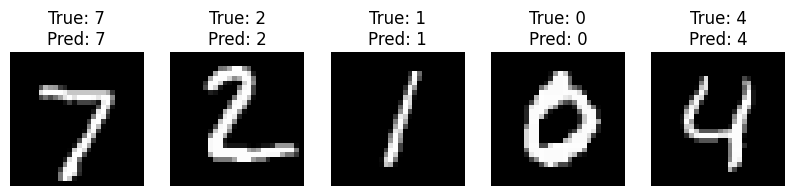

In [29]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(X_test)

def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

plot_images(X_test, y_test, predictions)

##Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

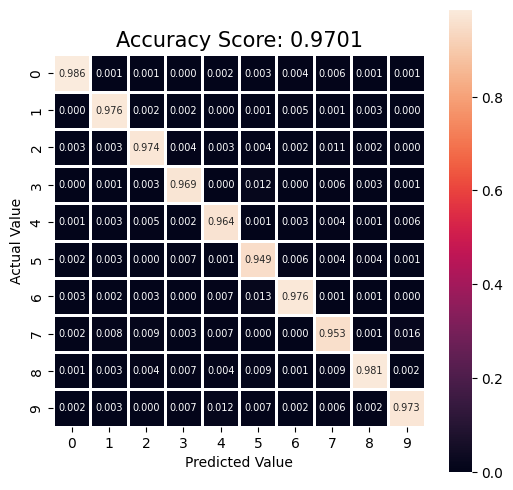

In [33]:
cm = confusion_matrix(y_test, predictions , normalize='pred')

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.75, square = True, annot_kws={"size": 7})
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Accuracy Score: {:.4f}'.format(test_acc), size = 15)
plt.show()